In [61]:
pip install kaleido

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [62]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import kaleido

In [2]:
df = pd.read_csv("country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df1=df.copy()

In [7]:
df1.shape


(167, 10)

In [8]:
df1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
#drop country column
data=df1.drop(['country'],axis=1)

## Correlation matrix

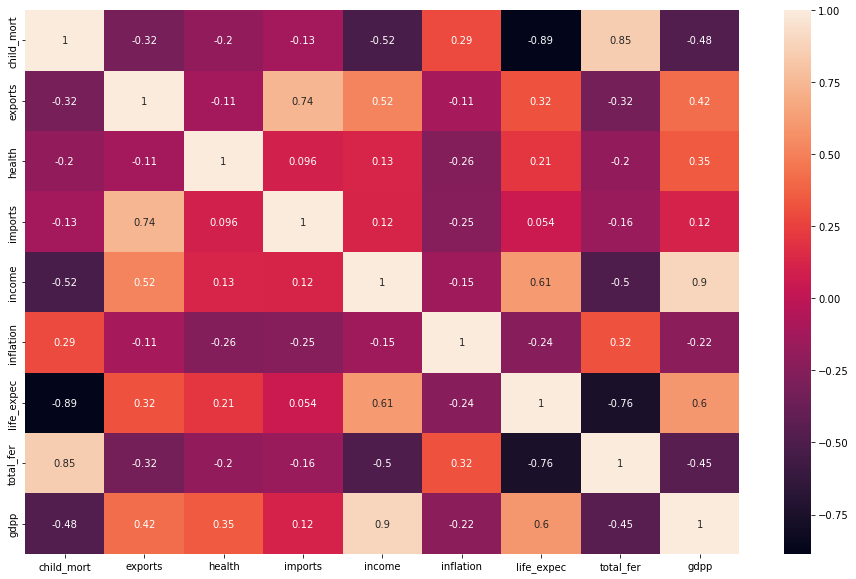

In [11]:
#correlation 
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
data=data.drop(['income'],axis=1)

## Distribution of Features


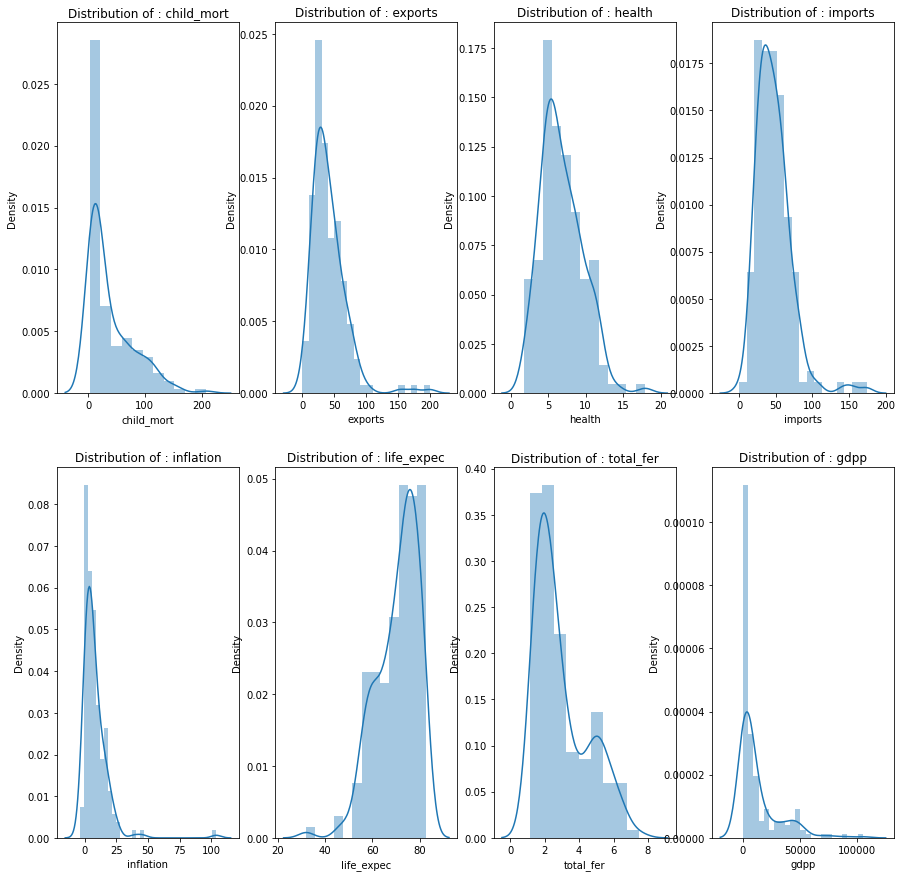

In [24]:
columns=data.columns

fig, ax = plt.subplots(nrows = 2,ncols = 4,figsize = (15,15))
for i in range(len(columns)):
    plt.subplot(2,4,i+1)
    sns.distplot(data[columns[i]])
    title = 'Distribution of : ' + columns[i]
    plt.title(title)
plt.show()

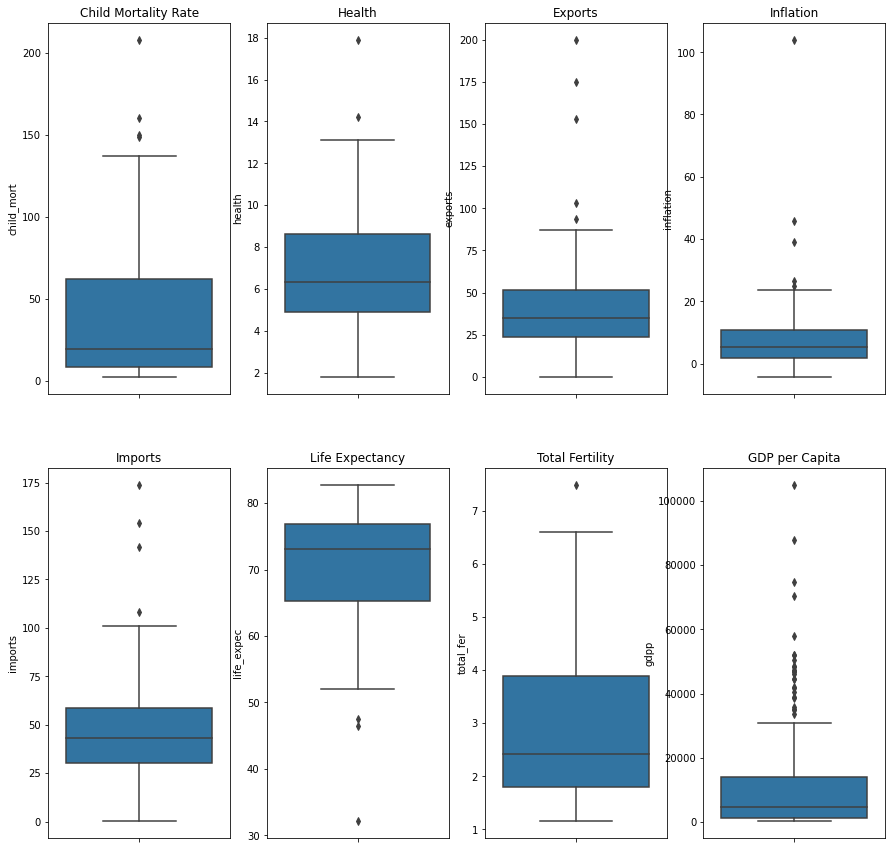

In [23]:
#box plot
fig, ax = plt.subplots(2, 4, figsize=(15, 15))
bp=sns.boxplot(y=data.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=data.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')
s=sns.boxplot(y=data.exports,ax=ax[0,2])
ax[0,2].set_title('Exports')
bp=sns.boxplot(y=data.inflation,ax=ax[0, 3])
ax[0,3].set_title('Inflation')
bp=sns.boxplot(y=data.imports,ax=ax[1, 0])
ax[1, 0].set_title('Imports')
s=sns.boxplot(y=data.life_expec,ax=ax[1,1])
ax[1,1].set_title('Life Expectancy')
s=sns.boxplot(y=data.total_fer,ax=ax[1,2])
ax[1,2].set_title('Total Fertility')
s=sns.boxplot(y=data.gdpp,ax=ax[1,3])
ax[1,3].set_title('GDP per Capita')

plt.show()

## Scale Data with Standard Scale because we have normal distribution in most features

In [25]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(data)

'''scale numeric features now'''
X = ss.transform(data)

In [33]:
data1=data.drop(['gdpp'],axis=1)
ss1 = StandardScaler()

'''fit scaler on numeric features'''
ss1.fit(data1)

'''scale numeric features now'''
X1 = ss1.transform(data1)


## Hierarchical clustering - Sklearn agglomerative()

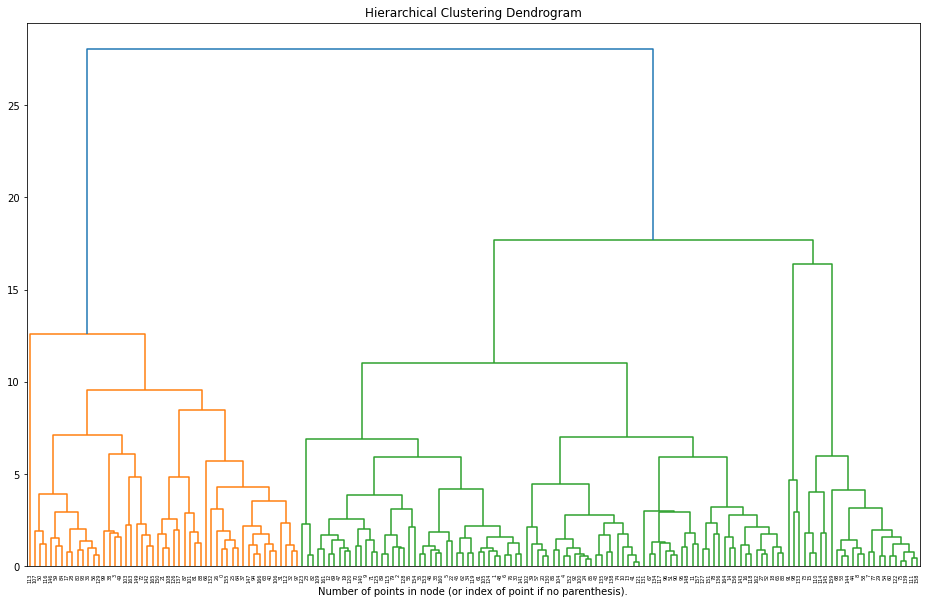

In [49]:
# Create Dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.figure(figsize=(16,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Clusters 2

In [50]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')  
cluster.fit_predict(X)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [52]:
df_hier=df.copy()
df_hier["clusters"]=cluster.labels_

In [53]:
df_hier

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [56]:
mean_values=df_hier.groupby("clusters").mean()
mean_values

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,16.255172,46.888621,6.973793,48.675862,22930.086207,5.541388,75.176724,2.125172,17781.689655
1,88.343137,27.963118,6.456078,42.828743,3985.745098,12.877745,60.045098,4.819412,2006.627451


## Clusters 3

In [77]:
cluster1 = AgglomerativeClustering(n_clusters=3, linkage='ward')  
cluster1.fit_predict(X)

df_hier1=df.copy()
df_hier1["clusters"]=cluster1.labels_

mean_values1=df_hier1.groupby("clusters").mean()
mean_values1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters,,,,,,,,,
0,4.264000,57.192000,10.182400,52.672000,43544.000000,1.453480,80.936000,1.710400,47468.000000
1,88.343137,27.963118,6.456078,42.828743,3985.745098,12.877745,60.045098,4.819412,2006.627451
2,19.549451,44.058022,6.092308,47.578022,17266.923077,6.664440,73.594505,2.239121,9626.109890


AxesSubplot(0.125,0.125;0.775x0.755)


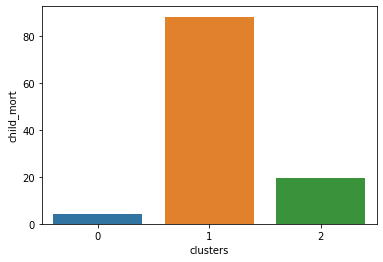

In [70]:
print(sns.barplot(x=mean_values1.index,y="child_mort",data=mean_values1))


AxesSubplot(0.125,0.125;0.775x0.755)


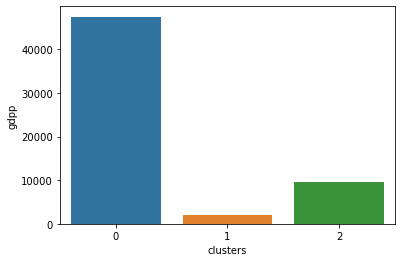

In [71]:
print(sns.barplot(x=mean_values1.index,y="gdpp",data=mean_values1))

In [78]:
df_hier1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [79]:
df_hier1['clusters'].loc[df_hier1['clusters'] == 0] = 'Developed countries'
df_hier1['clusters'].loc[df_hier1['clusters'] == 1] = 'Under-developed countries'
df_hier1['clusters'].loc[df_hier1['clusters'] == 2] = 'Developing countries'

fig = px.choropleth(df_hier1[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Rate of Development Per Country (World)',
                    color = df_hier1['clusters'],  
                    color_discrete_map = {'Under-developed countries':'Red',
                                        'Developed countries':'Green',
                                        'Developing countries':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')